## **Machine Learning Final Project DUE: Friday May 7th 11:59pm**

**Note: Please read all the instructions carefully before starting the project.**

For your final project you will build an ML model to analyze a dataset of your choice. You are welcome to keep working on the data in your EDA project if your data is large enough (at least 1000 rows for simple models and at least 10,000 for more complex models) or you can choose from the datasets/project suggestions below.

In this project make sure that you:
- Have a large enough dataset
- Split your data in training and testing
- Explore your data to inform which type of model to choose (no need if you are using your EDA dataset)
- Try different models on your training dataset - then select the most promising model
- Use cross validation to fine tune the model’s parameters such as alpha in lasso
- Simplify your model using regularization, prunnning, drop-out, etc. to avoid overfitting
- Communicate your model’s performance and make sure you compare it to a benchmark when appropriate
- Plot interesting graphs and results
- Write and publish your article to medium
- Commit your code to your GitHub

Please ensure you handle all the preprocessing before the modeling.

Suggestions for project:
You can take a look at the resources given below for choosing a dataset for your project. 

- Traffic sign detection - https://benchmark.ini.rub.de/gtsdb_dataset.html
- Cat and dog classifier - https://www.kaggle.com/c/dogs-vs-cats/data
- Other datasets from Kaggle - https://www.kaggle.com/data/41592

## **Grading Criteria**

- Show clear exploration of the data to justify model choice
- Train mutliple models and clearly articulate why you chose your final model
- Show your performance on test dataset
- Clear and concise write-up with clear well-documented figures
- Commit your code to GitHub

## **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Friday (05/07/2021)
- To submit your assignment, download your notebook and the dataset, zip the dataset and notebook, and submit the zipped file on blackboard.
- Make sure the notebook is named in the format - Final_LastName_FirstName. If you are submitting a zipped file, please name the file as well in the same format.
- Please include the link to access your blog and your github repo in your notebook.
- Also include the link to your notebook, github repo and the blog in the submission on blackboard. Please ensure the TAs have the required access to your notebooks and the github repo.

**Note - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.**

In [40]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [41]:
# data exploration and cleaning

df = pd.read_csv('weather.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/08,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/08,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/08,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/08,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/08,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [42]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
print(df.head())

        Date Location  MinTemp  MaxTemp  ...  RainToday  RainTomorrow  Year Month
0 2008-12-01   Albury     13.4     22.9  ...         No            No  2008    12
1 2008-12-02   Albury      7.4     25.1  ...         No            No  2008    12
2 2008-12-03   Albury     12.9     25.7  ...         No            No  2008    12
3 2008-12-04   Albury      9.2     28.0  ...         No            No  2008    12
4 2008-12-05   Albury     17.5     32.3  ...         No            No  2008    12

[5 rows x 25 columns]


In [ ]:
# check for null values

dfNull = df.isnull()
dfNull.sum()

Date                 0
Location             0
MinTemp           1198
MaxTemp           1015
Rainfall          2348
Evaporation      39687
Sunshine         46585
WindGustDir       6293
WindGustSpeed     6285
WindDir9am        7829
WindDir3pm        2974
WindSpeed9am      1448
WindSpeed3pm      2067
Humidity9am       2066
Humidity3pm       2488
Pressure9am      10656
Pressure3pm      10609
Cloud9am         33481
Cloud3pm         34509
Temp9am           1563
Temp3pm           2041
RainToday         2349
RainTomorrow      2347
Year                 0
Month                0
dtype: int64

In [43]:
# shorten data to 2014-2017, drop date, columns with large amount of null values, drop rows with null values

dfNew = df[(df['Year']>2013) & (df['Year']< 2017)]
df1 = dfNew.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],axis=1)
dfClean = df1.dropna()
dfClean.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
dtype: int64

In [ ]:
print(dfClean.info())
print(dfClean.count())
print(dfClean.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24487 entries, 1768 to 87023
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       24487 non-null  object 
 1   MinTemp        24487 non-null  float64
 2   MaxTemp        24487 non-null  float64
 3   Rainfall       24487 non-null  float64
 4   WindGustDir    24487 non-null  object 
 5   WindGustSpeed  24487 non-null  float64
 6   WindDir9am     24487 non-null  object 
 7   WindDir3pm     24487 non-null  object 
 8   WindSpeed9am   24487 non-null  float64
 9   WindSpeed3pm   24487 non-null  float64
 10  Humidity9am    24487 non-null  float64
 11  Humidity3pm    24487 non-null  float64
 12  Pressure9am    24487 non-null  float64
 13  Pressure3pm    24487 non-null  float64
 14  Temp9am        24487 non-null  float64
 15  Temp3pm        24487 non-null  float64
 16  RainToday      24487 non-null  object 
 17  RainTomorrow   24487 non-null  object 
 18  Yea

In [ ]:
dfClean.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
1768,Albury,12.0,27.4,0.0,WNW,43.0,SSE,ENE,11.0,20.0,56.0,38.0,1011.1,1008.6,20.3,25.9,No,No,2014,1
1769,Albury,16.7,27.7,0.0,W,31.0,WNW,WNW,6.0,20.0,61.0,22.0,1006.1,1005.8,22.3,26.4,No,No,2014,1
1770,Albury,18.9,30.6,0.2,WSW,44.0,ENE,W,6.0,15.0,40.0,32.0,1003.1,999.1,22.3,27.5,No,No,2014,1
1771,Albury,13.1,25.6,0.0,W,46.0,WSW,W,24.0,19.0,46.0,28.0,1006.8,1005.7,16.8,24.2,No,No,2014,1
1772,Albury,8.4,29.4,0.0,WNW,65.0,SE,NW,6.0,30.0,50.0,24.0,1009.4,1004.5,18.7,28.9,No,No,2014,1


In [ ]:
dfClean.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month
count,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000,24487.000000
mean,11.809201,22.790893,2.183216,40.391187,14.620166,19.047617,70.369788,51.838894,1018.226737,1015.926230,16.328983,21.274129,2015.015437,6.545596
std,5.829216,6.787659,7.788193,13.912058,8.542168,8.916881,17.775537,20.632296,7.247950,7.125102,5.793283,6.576701,0.822481,3.489947
min,-7.600000,4.600000,0.000000,9.000000,2.000000,2.000000,5.000000,1.000000,986.200000,982.600000,-1.000000,1.700000,2014.000000,1.000000
25%,7.600000,17.700000,0.000000,31.000000,7.000000,13.000000,59.000000,36.000000,1013.600000,1011.400000,12.000000,16.400000,2014.000000,3.000000
50%,11.800000,22.400000,0.000000,39.000000,13.000000,19.000000,71.000000,52.000000,1018.400000,1016.100000,16.300000,20.800000,2015.000000,7.000000
75%,16.300000,27.300000,0.800000,48.000000,19.000000,24.000000,84.000000,66.000000,1022.900000,1020.600000,20.600000,25.500000,2016.000000,10.000000
max,31.900000,47.300000,225.000000,135.000000,87.000000,74.000000,100.000000,100.000000,1039.200000,1037.300000,36.000000,45.800000,2016.000000,12.000000


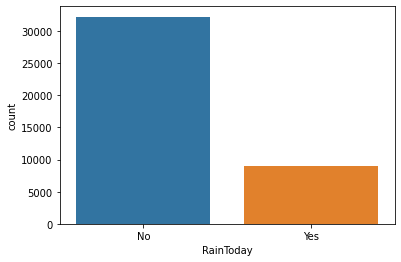

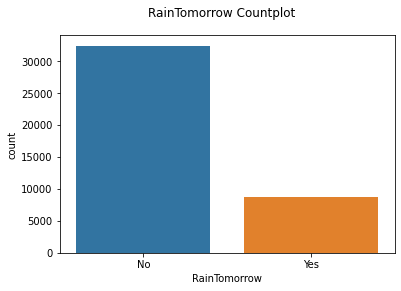

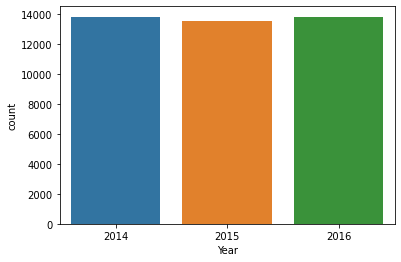

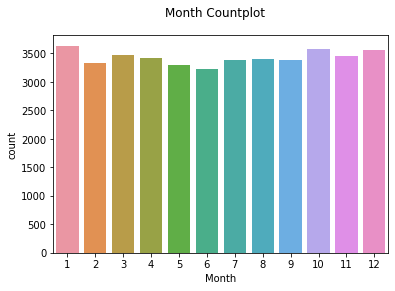

In [44]:
# Exploratory Data Analysis

plt.figure(1)
sb.countplot(x=dfClean['RainToday'])

plt.figure(2)
plt.suptitle("RainTomorrow Countplot")
sb.countplot(x=dfClean['RainTomorrow'])

plt.figure(3)
sb.countplot(x=dfClean['Year'])

plt.figure(4)
sb.countplot(x=dfClean['Month'])
plt.suptitle("Month Countplot")

plt.show()

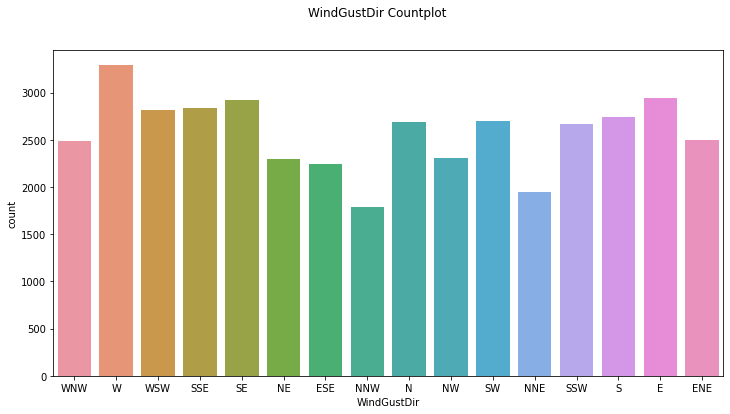

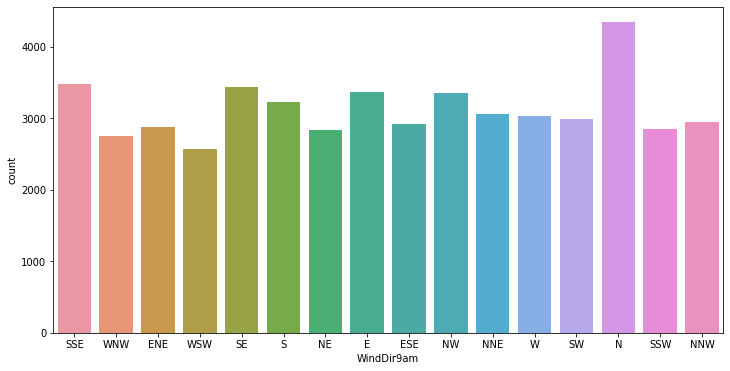

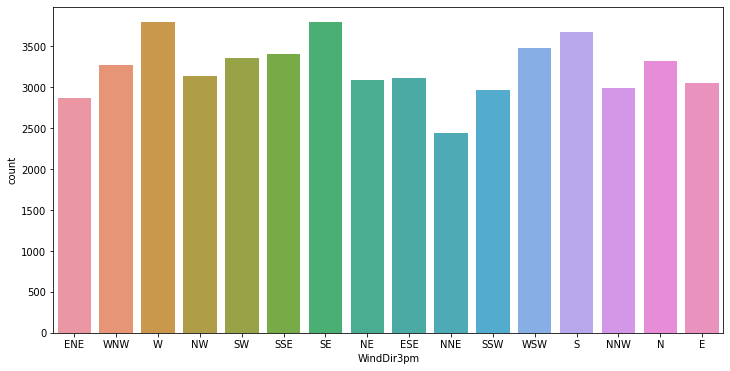

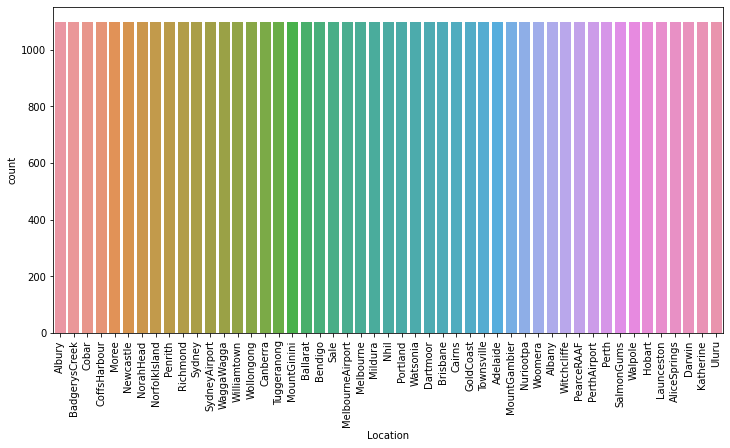

In [45]:
plt.figure(1, figsize=(12,6))
plt.suptitle("WindGustDir Countplot")
sb.countplot(x=dfClean['WindGustDir'])

plt.figure(2, figsize=(12,6))
sb.countplot(x=dfNew['WindDir9am'])

plt.figure(3, figsize=(12,6))
sb.countplot(x=dfNew['WindDir3pm'])

plt.figure(4, figsize=(12,6))
plt.xticks(rotation=90)
sb.countplot(x=dfNew['Location'])

plt.show()

In [ ]:
dfCorr = dfClean.corr()
print(dfCorr)

                MinTemp   MaxTemp  Rainfall  ...   Temp3pm      Year     Month
MinTemp        1.000000  0.725946  0.079683  ...  0.703453 -0.011646 -0.209123
MaxTemp        0.725946  1.000000 -0.098560  ...  0.985163 -0.045941 -0.142845
Rainfall       0.079683 -0.098560  1.000000  ... -0.100982  0.021385 -0.036011
WindGustSpeed  0.150024  0.060981  0.134600  ...  0.024987  0.002826  0.048326
WindSpeed9am   0.133071 -0.010607  0.085259  ... -0.022929 -0.002432  0.033001
WindSpeed3pm   0.137436  0.013273  0.065654  ... -0.010593  0.000871  0.052780
Humidity9am   -0.241806 -0.538318  0.233199  ... -0.530384  0.045023 -0.095729
Humidity3pm   -0.009857 -0.531764  0.249350  ... -0.576579  0.056291 -0.033461
Pressure9am   -0.441873 -0.320968 -0.169360  ... -0.281352 -0.060385  0.041789
Pressure3pm   -0.459315 -0.422990 -0.126403  ... -0.392839 -0.056801  0.032806
Temp9am        0.897398  0.885083 -0.018177  ...  0.861803 -0.026293 -0.128906
Temp3pm        0.703453  0.985163 -0.100982  ...  1.

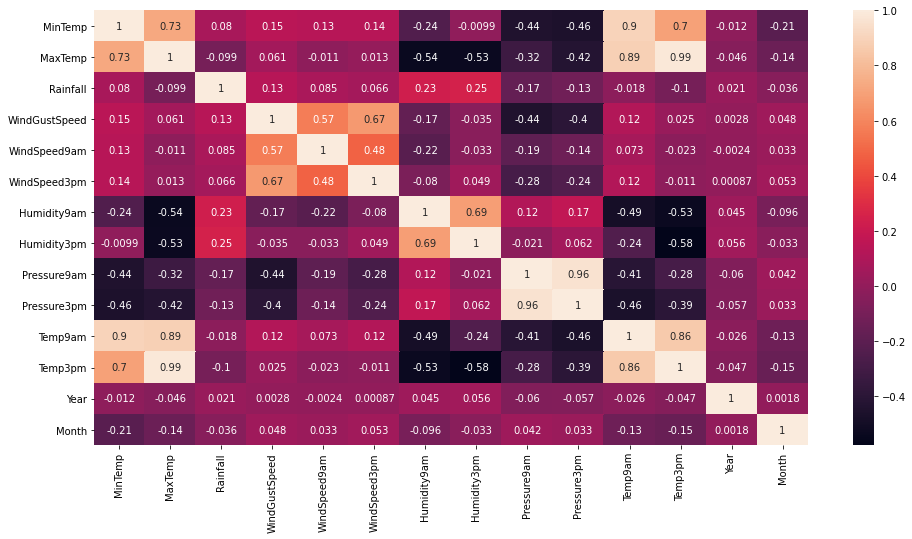

In [ ]:
fig = plt.figure()
fig.set_size_inches(16,8)

sb.heatmap(dfCorr, annot=True)
plt.show()

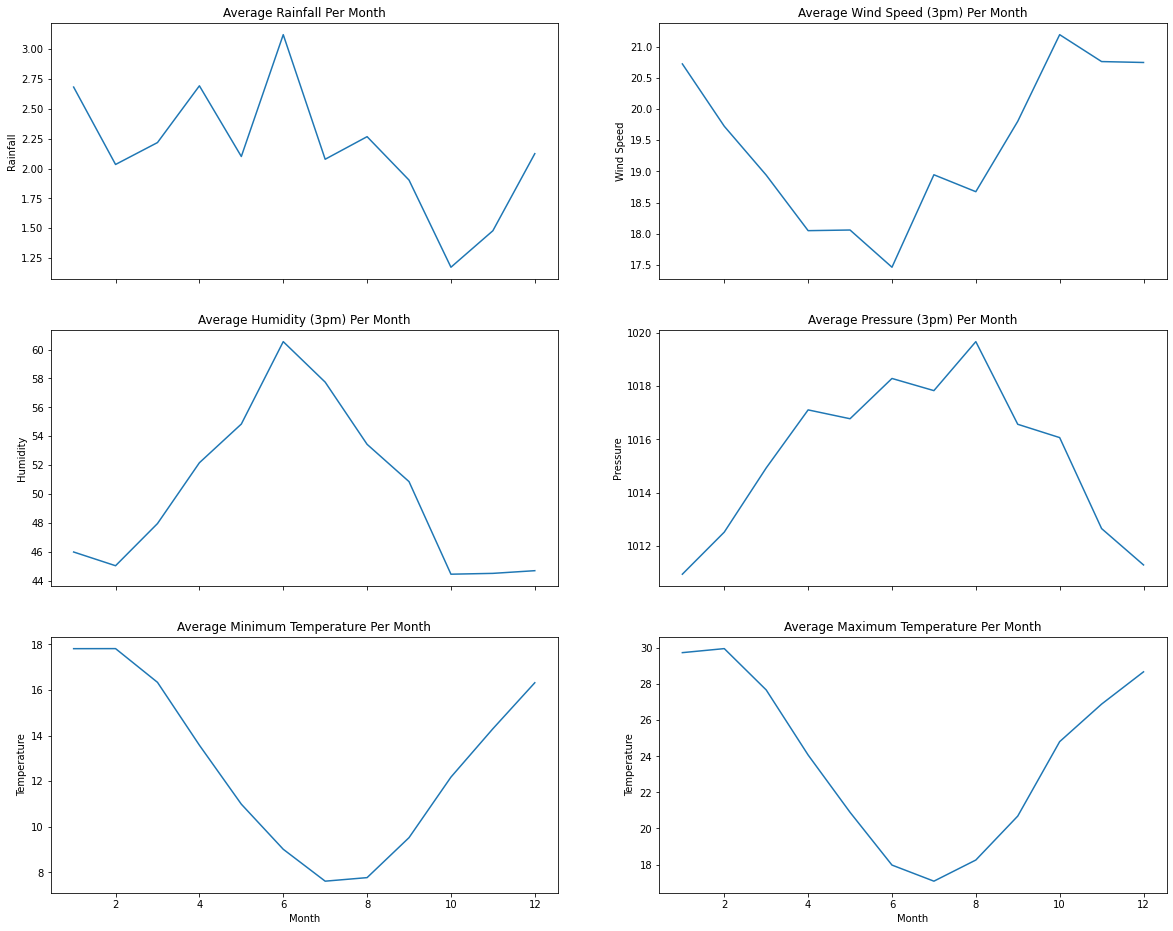

In [ ]:
dfMonth = dfClean.groupby('Month').mean()

fig = plt.figure()
fig.set_size_inches(20,16)
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
ax1.plot(dfMonth.index,dfMonth['Rainfall'])
ax1.set_title('Average Rainfall Per Month')
ax1.set_ylabel('Rainfall')
ax1.set_xticklabels('')

ax2.plot(dfMonth.index,dfMonth['WindSpeed3pm'])
ax2.set_title('Average Wind Speed (3pm) Per Month')
ax2.set_ylabel('Wind Speed')
ax2.set_xticklabels('')

ax3.plot(dfMonth.index,dfMonth['Humidity3pm'])
ax3.set_title('Average Humidity (3pm) Per Month')
ax3.set_ylabel('Humidity')
ax3.set_xticklabels('')

ax4.plot(dfMonth.index,dfMonth['Pressure3pm'])
ax4.set_title('Average Pressure (3pm) Per Month')
ax4.set_ylabel('Pressure')
ax4.set_xticklabels('')

ax5.plot(dfMonth.index,dfMonth['MinTemp'])
ax5.set_title('Average Minimum Temperature Per Month')
ax5.set_xlabel('Month')
ax5.set_ylabel('Temperature')

ax6.plot(dfMonth.index,dfMonth['MaxTemp'])
ax6.set_title('Average Maximum Temperature Per Month')
ax6.set_xlabel('Month')
ax6.set_ylabel('Temperature')


plt.show()

In [48]:
#ML
dummy = pd.get_dummies(data=dfClean, columns=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','Year'])
rainTomorrow = dummy.pop('RainTomorrow')
dummy.insert(0, 'RainTomorrow', rainTomorrow)
print(dummy)

       RainTomorrow  MinTemp  MaxTemp  ...  Year_2014  Year_2015  Year_2016
1768             No     12.0     27.4  ...          1          0          0
1769             No     16.7     27.7  ...          1          0          0
1770             No     18.9     30.6  ...          1          0          0
1771             No     13.1     25.6  ...          1          0          0
1772             No      8.4     29.4  ...          1          0          0
...             ...      ...      ...  ...        ...        ...        ...
145279           No     22.1     35.8  ...          0          0          1
145280           No     22.6     36.8  ...          0          0          1
145281           No     23.2     38.0  ...          0          0          1
145282           No     19.7     37.0  ...          0          0          1
145283           No     23.7     33.0  ...          0          0          1

[41160 rows x 111 columns]


In [49]:
# Logistic Regression
X = dummy.iloc[:, 1:] 
y = dummy.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
LR = LogisticRegression()
LR.fit(X_train,y_train)

LR_pred = LR.predict(X_test)
print("Logistic Regression Accuracy:", metrics.accuracy_score(y_test,LR_pred))

Logistic Regression Accuracy: 0.8454000647878199


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
# Classification Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.29, random_state=42, stratify=y)
ct = DecisionTreeClassifier(criterion='entropy',max_depth=6,random_state=42)
ct.fit(X_train, y_train)

ct_pred = ct.predict(X_test)
print("Classification Tree Accuracy:", metrics.accuracy_score(y_test, ct_pred))

Classification Tree Accuracy: 0.8466951495350591


In [51]:
# Dummy Classifier
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X_train,y_train)
accuracy = dc.score(X_test,y_test)
print(accuracy)

0.78646226019938


In [52]:
# Bagging
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
print("Bagging Accuracy:", bagging_accuracy)

Bagging Accuracy: 0.8513026723632403


In [53]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_features=8,random_state=42)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.858926028315322


In [54]:
# Boosting
base_est = DecisionTreeClassifier(max_depth=11)
ada = AdaBoostClassifier(base_est, n_estimators=200, random_state=42, learning_rate=0.05)
ada.fit(X_train,y_train)
ada_pred = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)
print("Boosting Accuracy:", ada_accuracy)

Boosting Accuracy: 0.8500460752282818


In [123]:
# Voting
rfc = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=6)
dtc = DecisionTreeClassifier()
svmc = SVC(probability=True)
log = LogisticRegression()

vc = VotingClassifier(estimators = [('rf',rfc),('dt',dtc),('svm',svmc)], voting='soft')

vc.fit(X_train, y_train)

vc_pred = vc.predict(X_test)
print("Voting Accuracy:", accuracy_score(y_test, vc_pred))

Voting Accuracy: 0.8334589930468291


In [ ]:
# Random Forest Out-of-Bag Evaluation
rf_oob = RandomForestClassifier(n_estimators=100,max_features=8,random_state=42,oob_score=True)
rf_oob.fit(X_train,y_train)
print(rf_oob.oob_score_)

0.8538137768196283


               Feature Importance
Humidity3pm              0.126208
Pressure3pm              0.063608
Humidity9am              0.062450
Pressure9am              0.056646
Temp3pm                  0.052808
WindGustSpeed            0.052076
MaxTemp                  0.048305
MinTemp                  0.046813
Temp9am                  0.041965
Rainfall                 0.040631
WindSpeed3pm             0.034980
WindSpeed9am             0.032290
Month                    0.027439
RainToday_No             0.023064
RainToday_Yes            0.018612
Year_2015                0.007619
Year_2016                0.007507
Year_2014                0.007460
WindDir9am_N             0.005409
WindDir3pm_N             0.004784
                        Feature Importance
Location_Nuriootpa                0.001873
Location_Nhil                     0.001871
Location_CoffsHarbour             0.001869
Location_Williamtown              0.001838
Location_WaggaWagga               0.001831
Location_Tuggeranong        

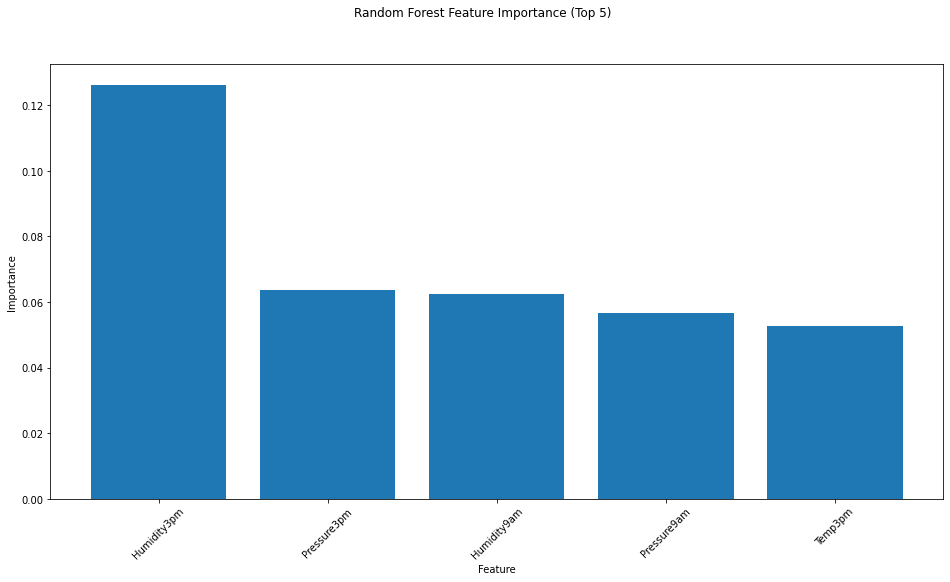

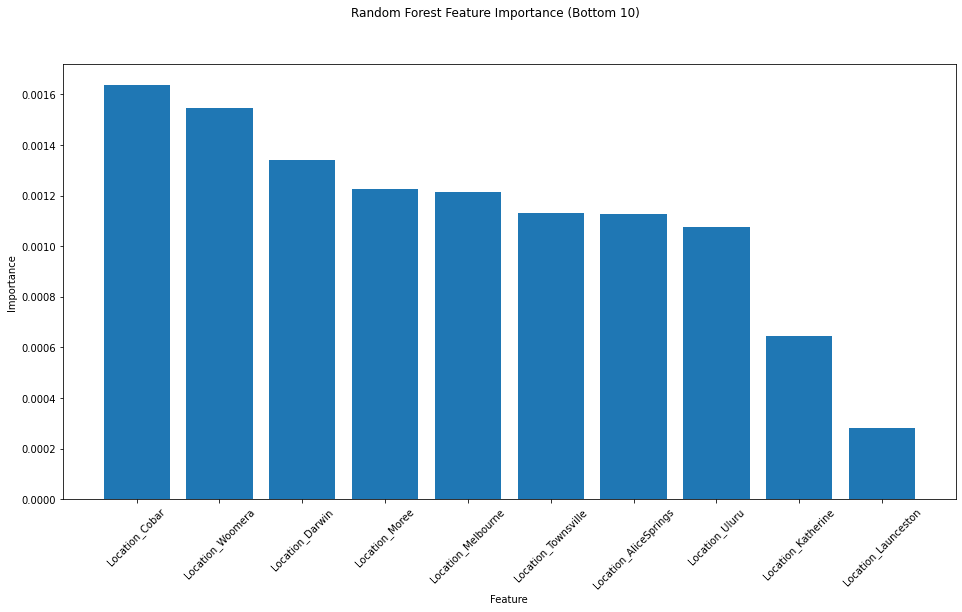

In [ ]:
#Random Forest Feature Importance
rf_features = pd.DataFrame(rf.feature_importances_, index=dummy.columns[1:],columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)
rf_graph_top5 = rf_features.iloc[:5]
rf_graph_bottom10 = rf_features.iloc[-10:]

print(rf_features.iloc[:20])
print(rf_features.iloc[-20:])

plt.figure(1, figsize=(16,8))
plt.bar(rf_graph_top5.index, rf_graph_top5['Feature Importance'])
plt.suptitle('Random Forest Feature Importance (Top 5)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)

plt.figure(2, figsize=(16,8))
plt.bar(rf_graph_bottom5.index, rf_graph_bottom5['Feature Importance'])
plt.suptitle('Random Forest Feature Importance (Bottom 10)')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()

In [69]:
# Tune Parameters with GridSearchCV
params = {
    'n_estimators':[50, 100,200],
    'random_state':[0,42,2020],
    'max_features':[4,6,8,'auto'],
}

gs = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,n_jobs=-1)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [70]:
print("Best Parameters:", gs.best_params_)
best = gs.best_estimator_
gs_pred = best.predict(X_test)
gs_accuracy = accuracy_score(y_test,gs_pred)
print("Grid Search Accuracy:", gs_accuracy)

Best Parameters: {'max_features': 8, 'n_estimators': 200, 'random_state': 2020}
Grid Search Accuracy: 0.8610203568735864


In [109]:
# Tune Parameters with RandomSearchCV

n_estimators = np.arange(0,500,50)
random_state = np.arange(0,100,10)
max_features = np.arange(0,9,.1)

random_params={
    'n_estimators':n_estimators,
    'random_state':[random_state,42,2020],
    'max_features':[max_features,'auto','sqrt'],
}

rs = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=random_params, cv=3, n_jobs=-1)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [122]:
print("Best Parameters:", rs.best_params_)
best_rs = rs.best_estimator_
rs_pred = best_rs.predict(X_test)
rs_accuracy = accuracy_score(y_test,rs_pred)
print("Randomized Search Accuracy:",rs_accuracy)

Best Parameters: {'random_state': 42, 'n_estimators': 450, 'max_features': 'auto'}
Randomized Search Accuracy: 0.8596799865962972


In [114]:
print("Model Accuracy")
print("Original:        ", rf_accuracy)
print("GridSearchCV:    ", gs_accuracy, "(improvement of", str(round(gs_accuracy- rf_accuracy,4)) + ")")
print("RandomSearchCV:  ", rs_accuracy, "(improvement of", str(round(rs_accuracy- rf_accuracy,4)) + ")")

Model Accuracy
Original:         0.858926028315322
GridSearchCV:     0.8610203568735864 (improvement of 0.0021)
RandomSearchCV:   0.8596799865962972 (improvement of 0.0008)
